Dataset a trabajar:

1. COMPAS: https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing

2. Lending Club Loan Data: https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction/input

3. Bank Marketing Data Set: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# URL del dataset COMPAS
url_compas = "https://raw.githubusercontent.com/mataguper20/trabajo_final_especializacion/master/Datasets_Usar/compas-scores-two-years.csv"

# URL del dataset Lending Club Loan Data
url_lending = "https://raw.githubusercontent.com/mataguper20/trabajo_final_especializacion/master/Datasets_Usar/lending_club_loan_two.csv"

# URL del dataset Bank Marketing
url_bank = "https://raw.githubusercontent.com/mataguper20/trabajo_final_especializacion/master/Datasets_Usar/bank-additional-full.csv"

In [157]:
df_compas = df = pd.read_csv(url_compas)

In [158]:
df_lending = pd.read_csv(url_lending)

In [159]:
df_bank = pd.read_csv(url_bank, sep=";")

In [183]:
def analyze_dataframe(df,name_df):

    print("\nDataset:",name_df)
    # Tamaño inicial
    initial_size = df.shape
    
    # Columnas con datos nulos
    notnull_columns = df.columns[~df.isnull().any()].tolist()
    null_columns = df.columns[df.isnull().any()].tolist()
   
    # Tamaño final (eliminando filas con datos nulos)
    df_clean = df.dropna()
    final_size = df_clean.shape
    
    print(f"Tamaño inicial: {initial_size}")
    print(f"Columnas con datos nulos: {null_columns}")
    print(f"Si se eliminaran las filas con nulos, Tamaño final: {final_size}")
    print(f"% de Filas a eliminar: {(initial_size[0] - final_size[0])/initial_size[0]*100.}")
    print(f"% de Columnas a eliminar: {(initial_size[1] - len(notnull_columns))/initial_size[1]*100.}")

    return notnull_columns

In [260]:
# Utilizando la función para analizar los DataFrames
notnull_columns_compas = analyze_dataframe(df_compas,"COMPAS")
notnull_columns_lending = analyze_dataframe(df_lending,"Lending")
notnull_columns_bank = analyze_dataframe(df_bank, "Bank")


Dataset: COMPAS
Tamaño inicial: (7214, 53)
Columnas con datos nulos: ['days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas', 'c_charge_desc', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc', 'in_custody', 'out_custody']
Si se eliminaran las filas con nulos, Tamaño final: (0, 53)
% de Filas a eliminar: 100.0
% de Columnas a eliminar: 41.509433962264154

Dataset: Lending
Tamaño inicial: (396030, 27)
Columnas con datos nulos: ['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies']
Si se eliminaran las filas con nulos, Tamaño final: (335868, 27)
% de Filas a eliminar: 15.191273388379667
% de Columnas a eliminar: 22.22222222222222

Dataset: Bank
Tamaño inicial: (41188, 21)
Columnas con datos nulos: []
Si se eliminaran las filas

In [238]:
def remove_columns(list_columns,columns_to_remove):
  for column in columns_to_remove:
      if column in list_columns:
          list_columns.remove(column)


In [261]:
remove_columns(notnull_columns_compas, ["name","id","first","last","age_cat" ])
print(notnull_columns_compas)

['compas_screening_date', 'sex', 'dob', 'age', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'is_recid', 'is_violent_recid', 'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date', 'priors_count.1', 'start', 'end', 'event', 'two_year_recid']


In [ ]:
notnull_columns_lending

In [ ]:
notnull_columns_bank

In [262]:
df_compas_drop_column = df_compas[notnull_columns_compas]

In [193]:
df_lending_drop_column = df_lending[notnull_columns_lending]

In [194]:
df_bank_drop_column = df_bank[notnull_columns_bank]

In [196]:
# Utilizando la función para analizar los DataFrames
_ = analyze_dataframe(df_compas_drop_column,"COMPAS")
_ = analyze_dataframe(df_lending_drop_column,"Lending")
_ = analyze_dataframe(df_bank_drop_column, "Bank")


Dataset: COMPAS
Tamaño inicial: (7214, 31)
Columnas con datos nulos: []
Si se eliminaran las filas con nulos, Tamaño final: (7214, 31)
% de Filas a eliminar: 0.0
% de Columnas a eliminar: 0.0

Dataset: Lending
Tamaño inicial: (396030, 21)
Columnas con datos nulos: []
Si se eliminaran las filas con nulos, Tamaño final: (396030, 21)
% de Filas a eliminar: 0.0
% de Columnas a eliminar: 0.0

Dataset: Bank
Tamaño inicial: (41188, 21)
Columnas con datos nulos: []
Si se eliminaran las filas con nulos, Tamaño final: (41188, 21)
% de Filas a eliminar: 0.0
% de Columnas a eliminar: 0.0


In [263]:
text_columns_compas = df_compas_drop_column.select_dtypes(include='object').columns.tolist()
num_columns_compas = df_compas_drop_column.select_dtypes(include='int64').columns.tolist()

In [264]:
text_columns_compas

['compas_screening_date',
 'sex',
 'dob',
 'race',
 'c_charge_degree',
 'type_of_assessment',
 'score_text',
 'screening_date',
 'v_type_of_assessment',
 'v_score_text',
 'v_screening_date']

In [222]:
df_compas_drop_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sex                   7214 non-null   object
 1   dob                   7214 non-null   object
 2   age                   7214 non-null   int64 
 3   race                  7214 non-null   object
 4   juv_fel_count         7214 non-null   int64 
 5   decile_score          7214 non-null   int64 
 6   juv_misd_count        7214 non-null   int64 
 7   juv_other_count       7214 non-null   int64 
 8   priors_count          7214 non-null   int64 
 9   c_charge_degree       7214 non-null   object
 10  is_recid              7214 non-null   int64 
 11  is_violent_recid      7214 non-null   int64 
 12  type_of_assessment    7214 non-null   object
 13  decile_score.1        7214 non-null   int64 
 14  score_text            7214 non-null   object
 15  screening_date        7214 non-null   

In [269]:
df_compas_drop_column[text_columns_compas]

,compas_screening_date,sex,dob,race,c_charge_degree,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date
0,2013-08-14,Male,1947-04-18,Other,F,Risk of Recidivism,Low,2013-08-14,Risk of Violence,Low,2013-08-14
1,2013-01-27,Male,1982-01-22,African-American,F,Risk of Recidivism,Low,2013-01-27,Risk of Violence,Low,2013-01-27
2,2013-04-14,Male,1991-05-14,African-American,F,Risk of Recidivism,Low,2013-04-14,Risk of Violence,Low,2013-04-14
3,2013-01-13,Male,1993-01-21,African-American,F,Risk of Recidivism,High,2013-01-13,Risk of Violence,Medium,2013-01-13
4,2013-03-26,Male,1973-01-22,Other,F,Risk of Recidivism,Low,2013-03-26,Risk of Violence,Low,2013-03-26
...,...,...,...,...,...,...,...,...,...,...,...
7209,2013-11-23,Male,1992-07-17,African-American,F,Risk of Recidivism,Medium,2013-11-23,Risk of Violence,Medium,2013-11-23
7210,2014-02-01,Male,1993-03-25,African-American,F,Risk of Recidivism,Low,2014-02-01,Risk of Violence,Medium,2014-02-01
7211,2014-01-14,Male,1958-10-01,Other,F,Risk of Recidivism,Low,2014-01-14,Risk of Violence,Low,2014-01-14
7212,2014-03-09,Female,1982-11-17,African-American,M,Risk of Recidivism,Low,2014-03-09,Risk of Violence,Low,2014-03-09


In [218]:
df_compas_drop_column[m]

,compas_screening_date,sex,dob,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,...,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,priors_count.1,start,end,event,two_year_recid


In [248]:
df_compas_drop_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   compas_screening_date  7214 non-null   int64
 1   sex                    7214 non-null   int64
 2   dob                    7214 non-null   int64
 3   age                    7214 non-null   int64
 4   race                   7214 non-null   int64
 5   juv_fel_count          7214 non-null   int64
 6   decile_score           7214 non-null   int64
 7   juv_misd_count         7214 non-null   int64
 8   juv_other_count        7214 non-null   int64
 9   priors_count           7214 non-null   int64
 10  c_charge_degree        7214 non-null   int64
 11  is_recid               7214 non-null   int64
 12  is_violent_recid       7214 non-null   int64
 13  type_of_assessment     7214 non-null   int64
 14  decile_score.1         7214 non-null   int64
 15  score_text             7214 non-null  

In [ ]:
le = LabelEncoder()
for etiqueta in text_columns_compas:
    df_compas_drop_column[etiqueta] = le.fit_transform(df_compas_drop_column[etiqueta])

In [249]:
X = df_compas_drop_column.iloc[:, 0:-1]
y = df_compas_drop_column.iloc[:, -1]

In [ ]:
X.info()

In [ ]:
y

In [253]:
# Dividir los datos en entrenamiento y prueba (70% para entrenamiento y 30% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de árbol de decisión con profundidad máxima de 5
modelo = DecisionTreeClassifier(max_depth=3)

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Calcular la precisión del modelo en los datos de prueba
accuracy = modelo.score(X_test, y_test)

# Imprimir la precisión del modelo
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 98.98%


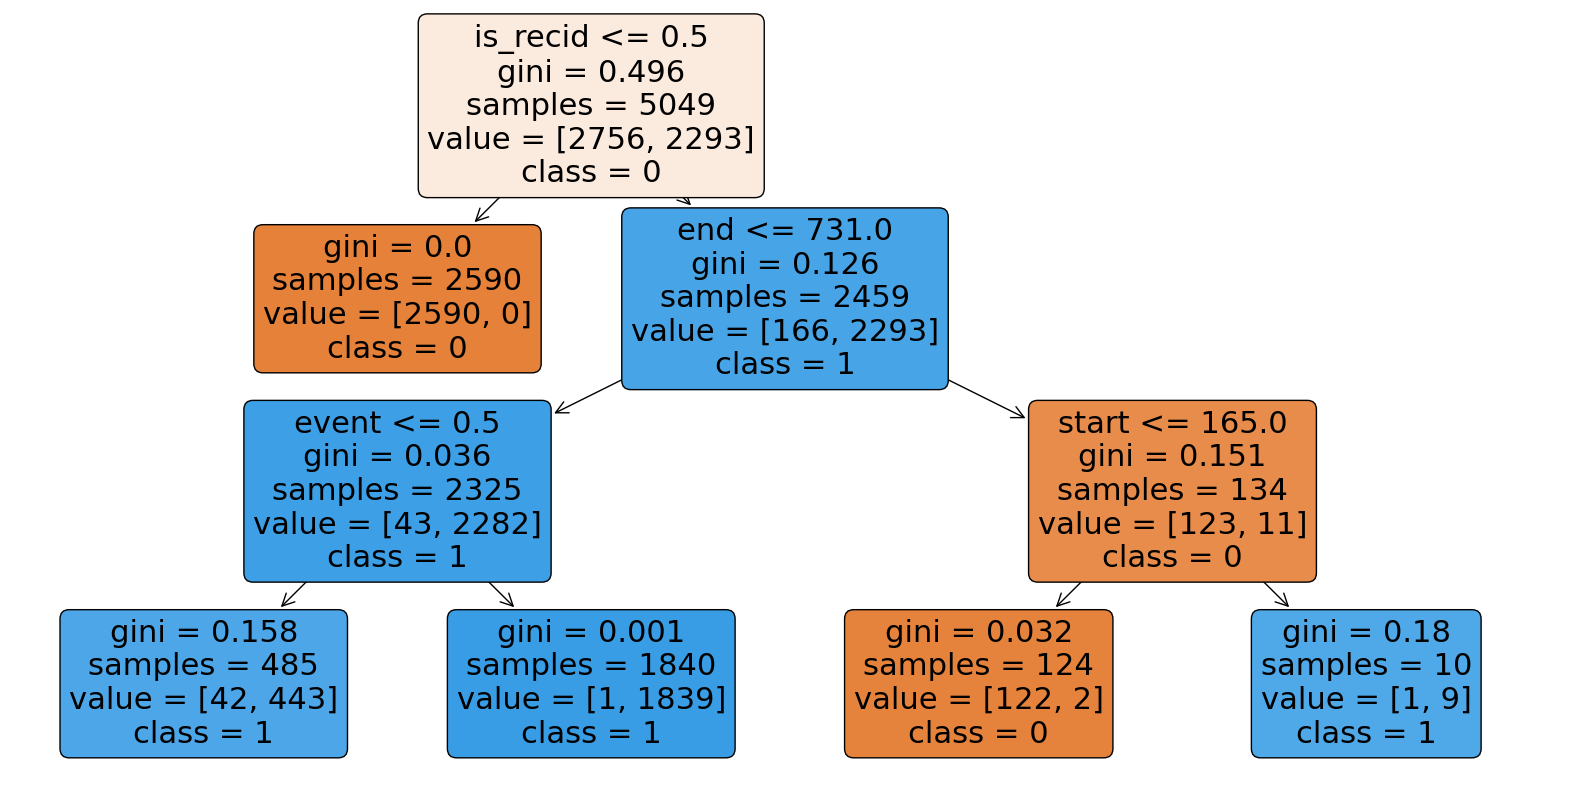

In [259]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convertir los nombres de las clases a str
class_names_str = [str(x) for x in modelo.classes_]

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=X.columns, class_names=class_names_str, filled=True, rounded=True)
plt.show()


In [271]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compila el modelo
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Entrena el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluar el modelo
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy*100))

# Realiza predicciones
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)


Epoch 1/50
158/158 [==============================] - 3s 7ms/step - loss: 9.1053 - accuracy: 0.7613 - val_loss: 0.8681 - val_accuracy: 0.8406
Epoch 2/50
158/158 [==============================] - 1s 8ms/step - loss: 0.9690 - accuracy: 0.8370 - val_loss: 1.2634 - val_accuracy: 0.6988
Epoch 3/50
158/158 [==============================] - 1s 4ms/step - loss: 0.7252 - accuracy: 0.8526 - val_loss: 0.5661 - val_accuracy: 0.8850
Epoch 4/50
158/158 [==============================] - 1s 4ms/step - loss: 0.7807 - accuracy: 0.8532 - val_loss: 0.3830 - val_accuracy: 0.8975
Epoch 5/50
158/158 [==============================] - 0s 3ms/step - loss: 0.7403 - accuracy: 0.8495 - val_loss: 0.3035 - val_accuracy: 0.9044
Epoch 6/50
158/158 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.8604 - val_loss: 0.3067 - val_accuracy: 0.8970
Epoch 7/50
158/158 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.8592 - val_loss: 0.3743 - val_accuracy: 0.9076
Epoch 

In [272]:
!pip install pydot graphviz ann_visualizer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4179 sha256=be25046e969017236ec6c75cbc1083bebdc71fc9b6d3b1dfa9c90d927e1b83cf
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


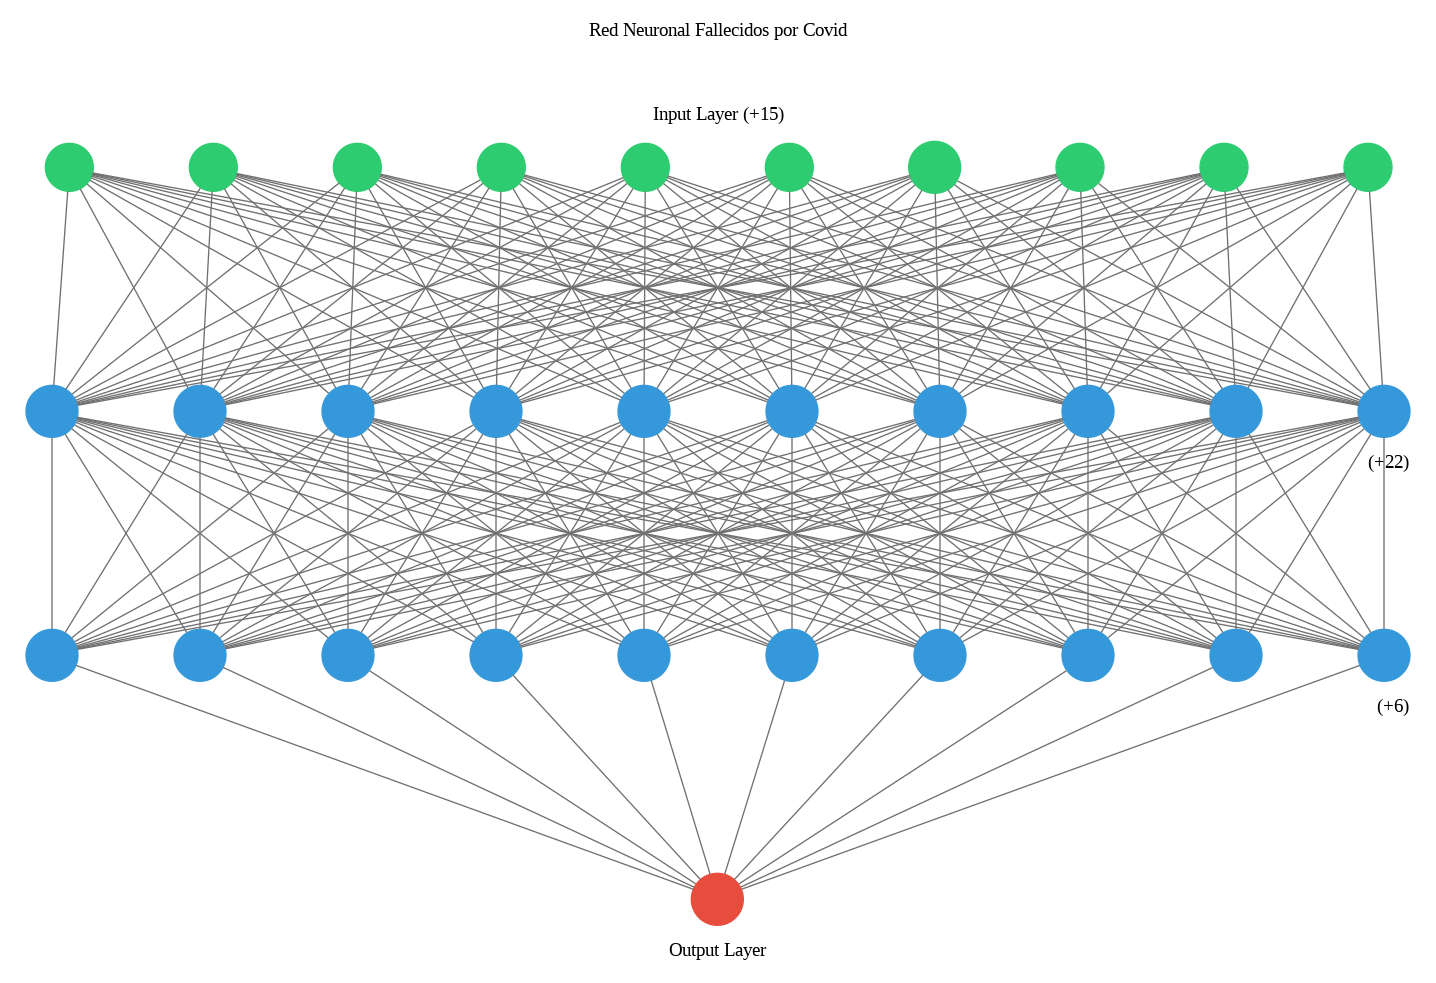

In [273]:
from ann_visualizer.visualize import ann_viz

ann_viz(model, view=True, filename="redNeuronal.gv", title="Red Neuronal Fallecidos por Covid")
!dot -Tpng redNeuronal.gv -o redNeuronal.png
from IPython.display import Image

Image(filename='redNeuronal.png')

In [274]:
!pip install lime shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 18.6 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=f33569d142cedb65a700216c76d2b6a47fface33d61616c2913fdc60e7897814
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
X_test

,EDAD_DIAGNOSTICO,PROVINCIA_RESIDENCIA,DEPARTAMENTO_RESIDENCIA,CUIDADO_INTENSIVO
66383,30.0,17,71,1
89870,82.0,2,44,0
182600,37.0,17,62,0
177246,5.0,7,83,0
115473,2.0,13,211,1
...,...,...,...,...
20516,27.0,17,71,0
187119,33.0,17,62,0
180033,21.0,1,138,0
124423,18.0,17,62,0


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


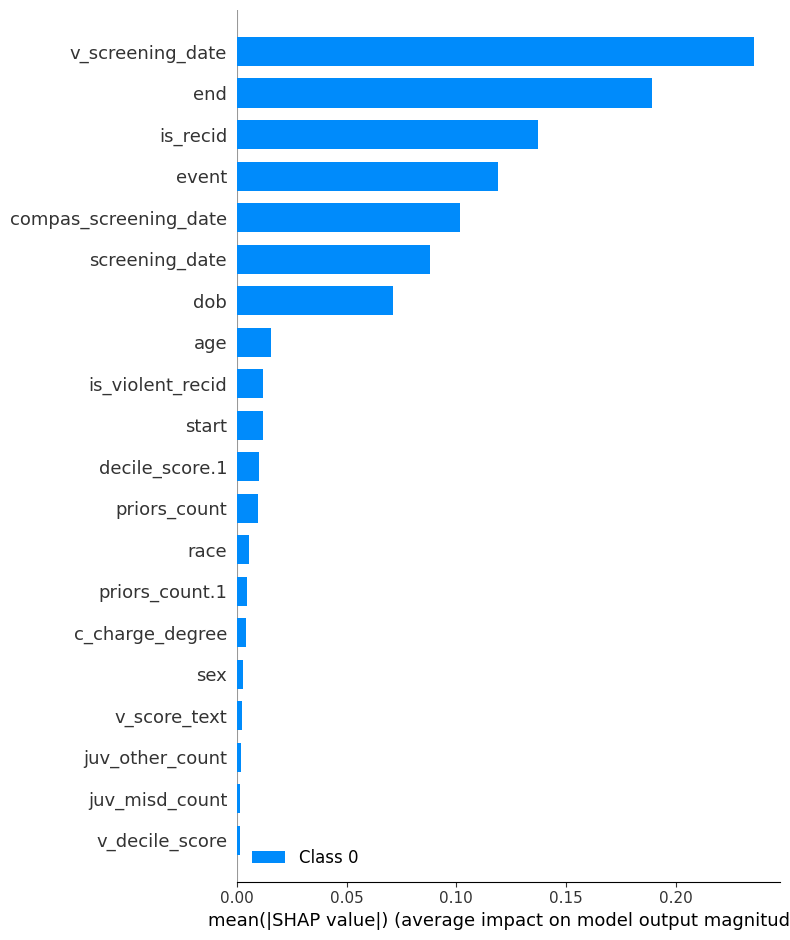

In [275]:

import shap


#  Utilizar SHAP para explicar las predicciones
explainer_shap = shap.DeepExplainer(model, X_train.values)
shap_values = explainer_shap.shap_values(X_test.values)

# Para SHAP
shap.summary_plot(shap_values, X_test)


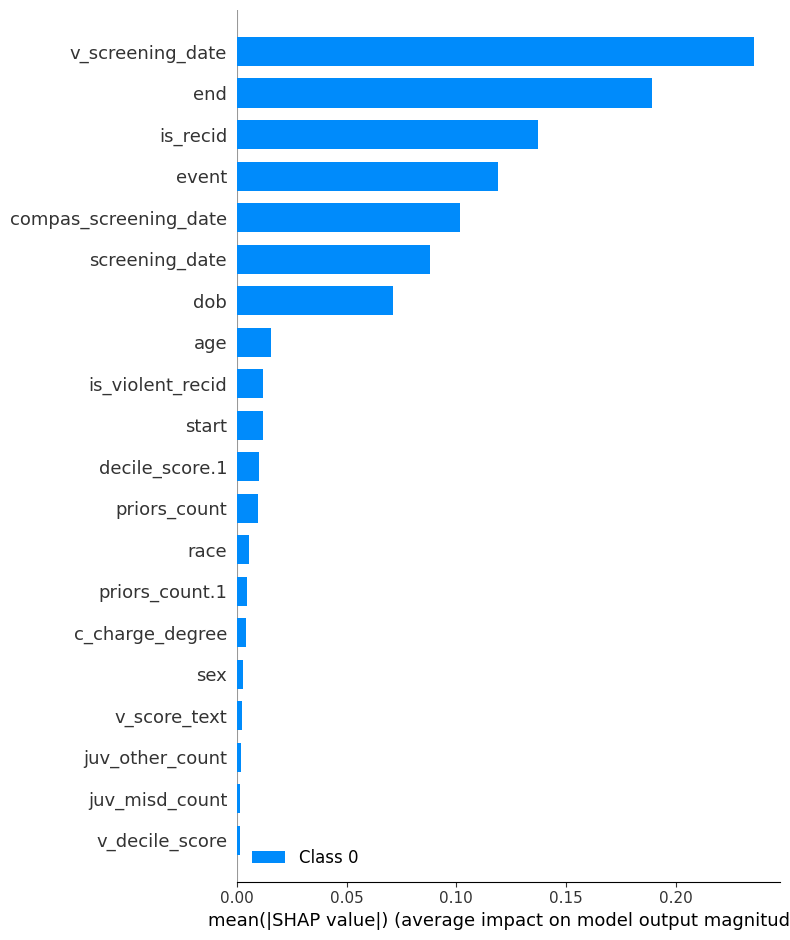

In [276]:
shap.summary_plot(shap_values, X_test)

In [277]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear objeto Random Forest y ajustar el modelo a los datos de entrenamiento
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Obtener el primer árbol de decisión del modelo
estimator = rf.estimators_[0]



print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

#tarda 2 segundos

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1207
           1       0.98      1.00      0.99       958

    accuracy                           0.99      2165
   macro avg       0.99      0.99      0.99      2165
weighted avg       0.99      0.99      0.99      2165

Confusion Matrix:
[[1188   19]
 [   1  957]]
Accuracy Score:
0.9907621247113164


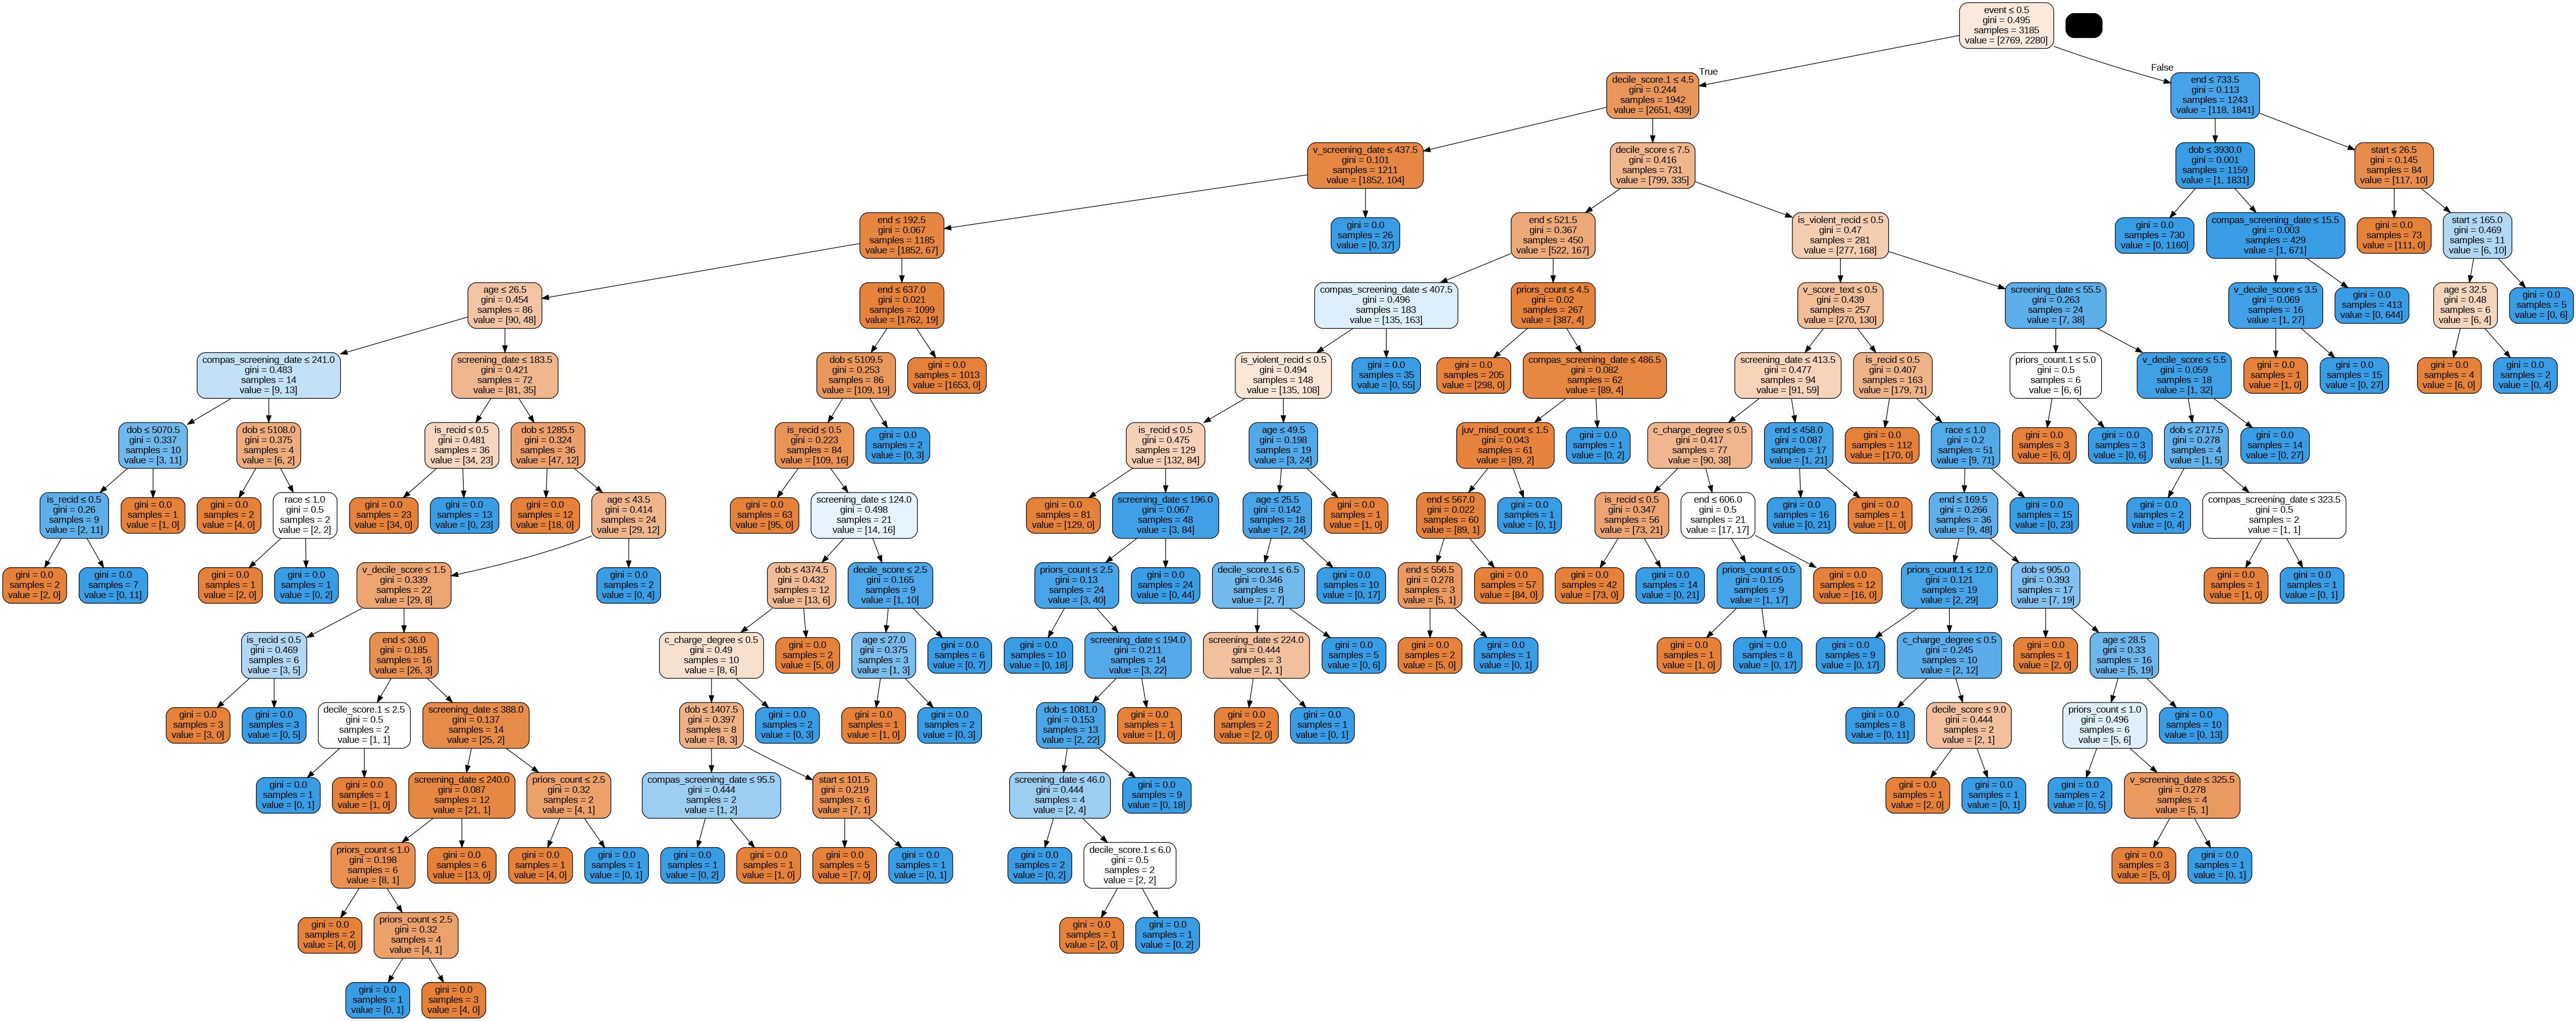

In [278]:
# Exportar el árbol de decisión a un archivo DOT
dot_data = export_graphviz(estimator, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Convertir el archivo DOT a un archivo PNG y mostrarlo
Image(graph.create_png())

#tarda 1 minuto

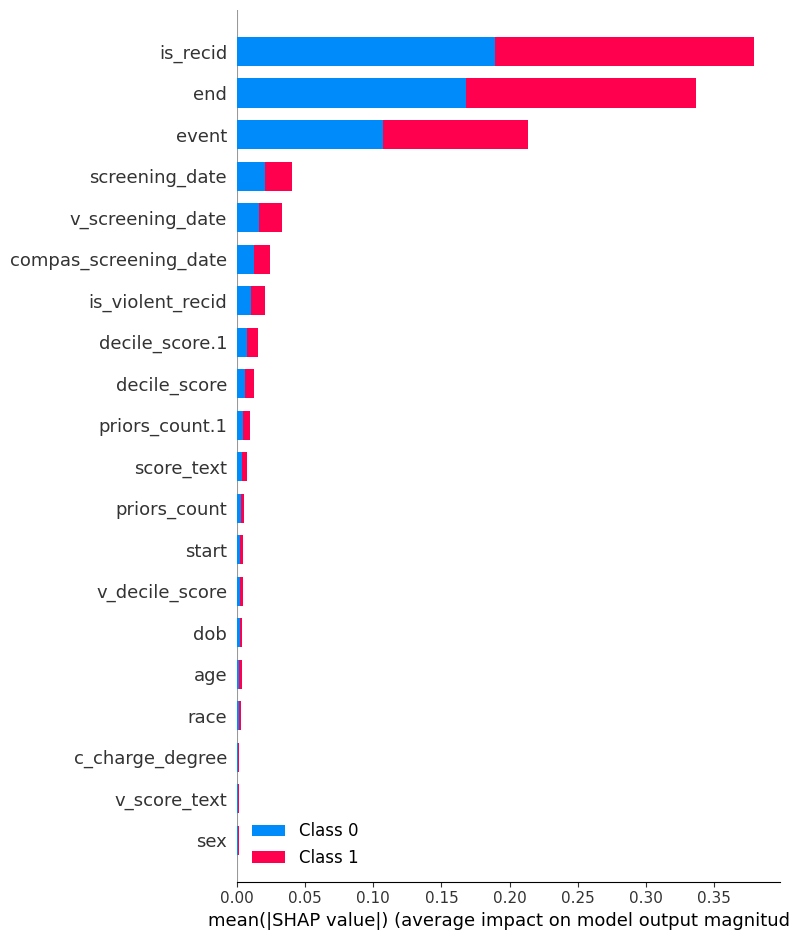

In [282]:
import shap

# Utilizar SHAP para explicar las predicciones
explainer_shap = shap.TreeExplainer(rf)
shap_values = explainer_shap.shap_values(X_test)

# Para SHAP
shap.summary_plot(shap_values, X_test)



In [279]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Puedes cambiar el kernel y otros parámetros aquí
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

#tardó 6:40 minutos en ejecutarse....

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1207
           1       0.98      0.99      0.98       958

    accuracy                           0.99      2165
   macro avg       0.99      0.99      0.99      2165
weighted avg       0.99      0.99      0.99      2165

Confusion Matrix:
[[1188   19]
 [  12  946]]
Accuracy Score:
0.9856812933025404


X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=7.097e-04, with an active set of 19 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 26 iterations, i.e. alpha=2.489e-04, with an active set of 20 regressors, and the smallest chol

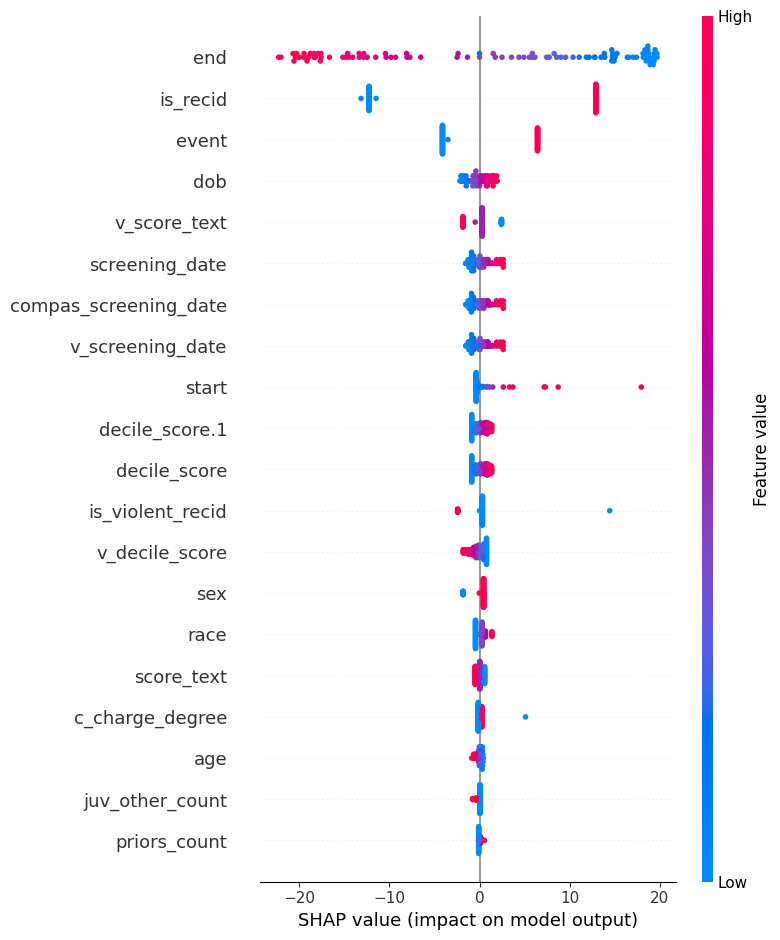

In [288]:
import shap

# Utilizar SHAP para explicar las predicciones
def predict_wrapper(X):
    return svm.decision_function(X)

# Seleccionar un subconjunto de los datos de prueba (puedes ajustar el tamaño según sea necesario)
X_test_subset = X_test.sample(100, random_state=42)

explainer_shap = shap.KernelExplainer(predict_wrapper, X_train)
shap_values = explainer_shap.shap_values(X_test_subset, nsamples=50)  # Reducir el número de muestras para acelerar el cómputo

# Para SHAP
shap.summary_plot(shap_values, X_test_subset)
